## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In this kernal you will see how we used EDA and drew conclusions from the data. The content of this kernel include:

1.<b> Understading the data:</b> A brief exploration of all the variables and their relationships

2.<b> Data Cleaning:</b> Checking for missing values, handling NANs.

3.<b> Visualising data:</b> With the help of different plots, see what the data tells.

4.<b> Drawing Conclusions:</b> Understanding what are the causes of the problem statement.

# Also we will answer some few questions:

## Q1. How many booking were cancelled in both type of hotels ?

## Q2. Which month is the most occupied and which is the least occupied?

## Q3. From which country most guests are coming?

## Q4. What are the number of weekend vs weekdays night bookings for resort hotels?

## Q5. Which months have cheaper booking rates?

## Q6. How many number of customers repeated their bookings?

## Q7. Which is the most booked accomodation type?



## Q8. What are the number of bookings made by different market segment?

## Q9. How does lead time affect cancellation?

## Q10. How does deposit type affect cancelation?

## Q11. How does ADR affect cancelation?

# 1. Understanding the data

First let me import python libraries which will help us a lot through this journey.

<b>Numpy</b> is a library to do high end calculations.

<b>Pandas</b> is a library to help work with dataframes.

<b>Matplotlib and Seaborn</b> are here to help visualize our data.

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'c:\Users\ADMIN\Downloads\Hotel Bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


number of records : 119390 
numbe rof features : 32

In [6]:
print('The columns in the dataset are:\n',df.columns)

The columns in the dataset are:
 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.dropna(inplace=True)

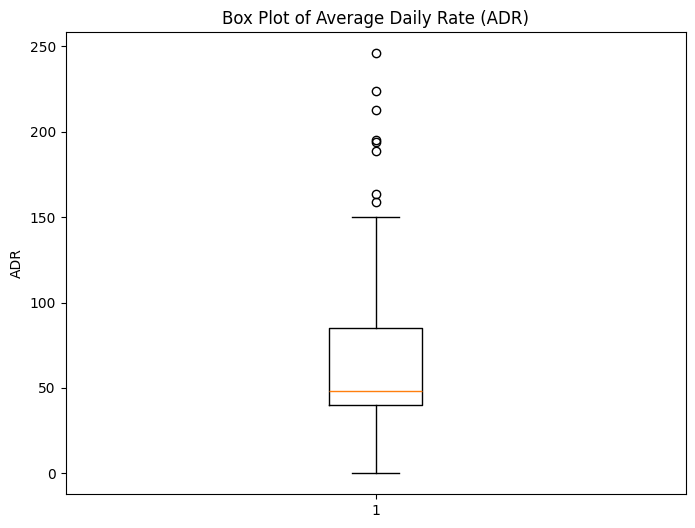

In [24]:
adr_data = df['adr']

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(adr_data)
plt.title('Box Plot of Average Daily Rate (ADR)')
plt.ylabel('ADR')
plt.show()

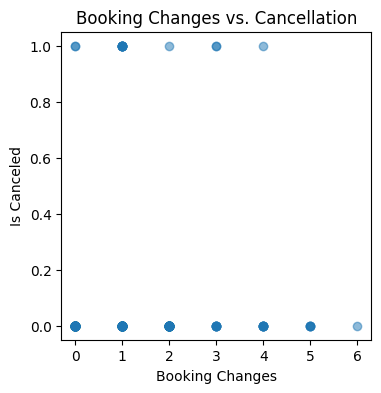

In [22]:
booking_changes = df['booking_changes']
is_canceled = df['is_canceled']

# Plot the scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(booking_changes, is_canceled, alpha=0.5)
plt.title('Booking Changes vs. Cancellation')
plt.xlabel('Booking Changes')
plt.ylabel('Is Canceled')

plt.show()

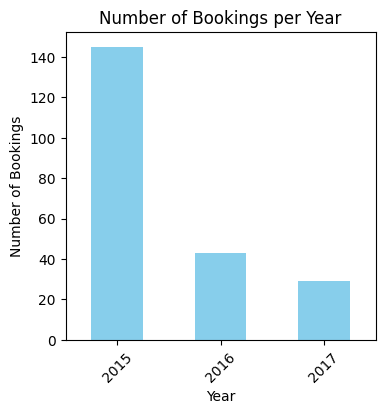

In [20]:
bookings_per_year = df['arrival_date_year'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(4, 4))
bookings_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Bookings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

plt.show()


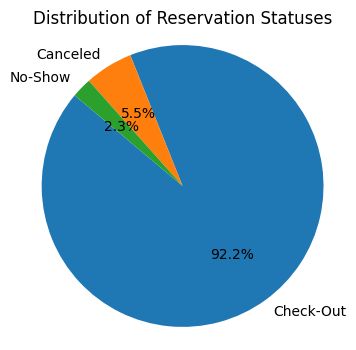

In [18]:
reservation_status_distribution = df['reservation_status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(reservation_status_distribution, labels=reservation_status_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reservation Statuses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Q1.

In [19]:
cancelled_bookings = df[df['is_canceled'] == 1].shape[0]
print("Total canceled bookings:", cancelled_bookings)

Total canceled bookings: 17


Q2.

In [20]:
monthly_occupancy = df['arrival_date_month'].value_counts()
most_occupied_month = monthly_occupancy.idxmax()
least_occupied_month = monthly_occupancy.idxmin()
print("Most occupied month:", most_occupied_month)
print("Least occupied month:", least_occupied_month)

Most occupied month: November
Least occupied month: April


Q3.

In [21]:
most_guests_country = df['country'].mode()[0]
print("Country with most guests:", most_guests_country)

Country with most guests: PRT


Q4.

In [26]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str))
df['is_weekend'] = df['arrival_date'].dt.dayofweek.isin([5, 6])

df = df[df['hotel'] == 'Resort Hotel']

weekend_bookings = df[df['is_weekend'] == True].shape[0]
weekday_bookings = df[df['is_weekend'] == False].shape[0]

print("Number of weekend bookings for resort hotels:", weekend_bookings)
print("Number of weekday bookings for resort hotels:", weekday_bookings)


Number of weekend bookings for resort hotels: 45
Number of weekday bookings for resort hotels: 125


Q5.

In [27]:
monthly_adr = df.groupby('arrival_date_month')['adr'].mean()
cheapest_month = monthly_adr.idxmin()
print("Cheapest booking month:", cheapest_month)

Cheapest booking month: February


Q6.

In [31]:

df['booking_identifier'] = df['arrival_date'].astype(str) + '_' + df['lead_time'].astype(str) + '_' + df['is_repeated_guest'].astype(str)

repeated_bookings_total = df['booking_identifier'].duplicated().sum()

print("Number of customers who repeated their bookings:", repeated_bookings_total)


Number of customers who repeated their bookings: 101


Q7.

In [32]:
most_booked_accommodation = df['reserved_room_type'].mode()[0]
print("Most booked accommodation type:", most_booked_accommodation)


Most booked accommodation type: A


Q8.

In [33]:
bookings_by_market_segment = df['market_segment'].value_counts()
print("Bookings by market segment:")
print(bookings_by_market_segment)

Bookings by market segment:
market_segment
Corporate        130
Direct            16
Online TA         14
Offline TA/TO      8
Groups             1
Complementary      1
Name: count, dtype: int64


Q9.

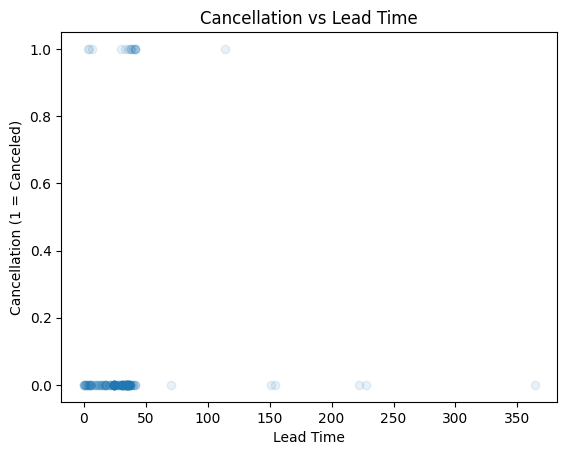

In [34]:
plt.scatter(df['lead_time'], df['is_canceled'], alpha=0.1)
plt.xlabel('Lead Time')
plt.ylabel('Cancellation (1 = Canceled)')
plt.title('Cancellation vs Lead Time')
plt.show()

Q10.

In [35]:
cancellation_by_deposit_type = df.groupby('deposit_type')['is_canceled'].mean()
print("Cancellation rate by deposit type:")
print(cancellation_by_deposit_type)

Cancellation rate by deposit type:
deposit_type
No Deposit    0.090361
Non Refund    0.000000
Refundable    0.000000
Name: is_canceled, dtype: float64
